# **DATA IMPORT AND READ**

In [ ]:
import pandas as pd

# Load the text file using space as the delimiter
data = pd.read_csv('/content/Laptop_and_USB.txt', sep=' ', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7
0,rawdata/images,-,2024-10-22T021044.954.bmp,1,16,52,263,196
1,rawdata/images,-,2024-10-22T021045.179.bmp,1,15,55,284,194
2,rawdata/images,-,2024-10-22T021045.357.bmp,1,25,6,249,250
3,rawdata/images,-,2024-10-22T021045.441.bmp,1,29,8,205,290
4,rawdata/images,-,2024-10-22T021046.092.bmp,1,44,26,217,266


In [ ]:
data['image_name'] = data[0].astype(str) + data[1].astype(str) + data[2].astype(str)
image_name=data['image_name']

In [ ]:
# 0 and 31 used for testing
test_data = data.iloc[[0, 31]]
data = data.drop([0, 31])

# **DATA PREPROSESSING**

In [ ]:
data = data.drop(columns=['image_name',0,1,2,3])

In [ ]:
data.head()

,4,5,6,7
1,15,55,284,194
2,25,6,249,250
3,29,8,205,290
4,44,26,217,266
5,7,34,288,224


In [ ]:
# Add column names
data.columns = ['x', 'y', 'w', 'h']  # Specify your column names here

In [ ]:
data['area']=data['w']*data['h']

In [ ]:
data.head()

,x,y,w,h,area
1,15,55,284,194,55096
2,25,6,249,250,62250
3,29,8,205,290,59450
4,44,26,217,266,57722
5,7,34,288,224,64512


In [ ]:
x=data['x']
y=data['y']

In [ ]:
data = data.drop(columns=['x','y'])

In [ ]:
data.head()

,w,h,area
1,284,194,55096
2,249,250,62250
3,205,290,59450
4,217,266,57722
5,288,224,64512


# **KNN**

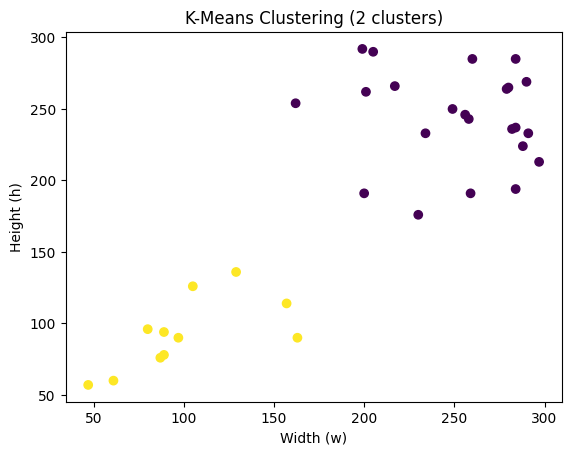

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the data for clustering (only 'w', 'h', and 'area')
X = data[['w', 'h', 'area']]

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(X)


# Visualize the clusters in 2D space (e.g., based on 'w' and 'h')
plt.scatter(data['w'], data['h'], c=data['cluster'], cmap='viridis')
plt.xlabel('Width (w)')
plt.ylabel('Height (h)')
plt.title('K-Means Clustering (2 clusters)')
plt.show()


In [ ]:
# Save DataFrame to CSV file
data['image_name'] =image_name
data['x']=x
data['y']=y
data = data[['image_name','x','y','w', 'h', 'area','cluster']]
output_file = '/content/clustering_output.csv'  # Replace with your desired file path
data.to_csv(output_file, index=False)  # index=False to avoid saving row numbers

print(f"Data saved to {output_file}")

Data saved to /content/clustering_output.csv


In [ ]:
# # 0 and 31 used for testing
# test_data = test_data.drop(columns=[0,1,2,3])


In [ ]:
test_data[8]=test_data[6]*test_data[7]

In [ ]:
test_data

,0,1,2,3,4,5,6,7,image_name,8
0,rawdata/images,-,2024-10-22T021044.954.bmp,1,16,52,263,196,rawdata/images-2024-10-22T021044.954.bmp,51548
31,rawdata/images,-,2024-10-22T021159.911.bmp,1,107,179,46,49,rawdata/images-2024-10-22T021159.911.bmp,2254


In [ ]:

test_data=test_data[[6,7,8]]
# Predict the cluster for the new data
new_clusters = kmeans.predict(test_data)

# Assign the predicted clusters to the new data
test_data['cluster'] = new_clusters

# Display the new data with cluster assignments
print(test_data)

      6    7      8  cluster
0   263  196  51548        0
31   46   49   2254        1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
<ipython-input-176-6adaa75a9101>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cluster'] = new_clusters


# **POST PROCESSING**

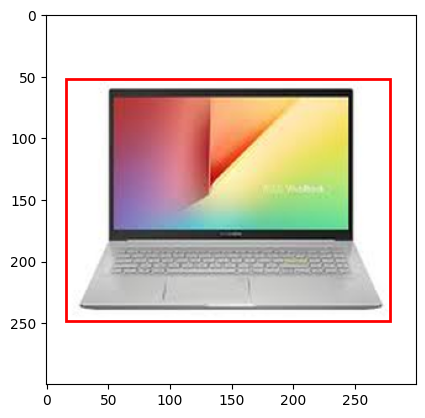

In [ ]:
#predict as 0 Laptop
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Specify the file path for the image
image_path = '/content/images - 2024-10-22T021044.954.bmp'  # Replace with your BMP image path

# Read the image using OpenCV
image = cv2.imread(image_path)

# Resize the image to 300x300
image_resized = cv2.resize(image, (300, 300))

# Convert the image from BGR (OpenCV default) to RGB for Matplotlib
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Coordinates and size of the rectangle (x, y, w, h) after resizing
# Adjust these values based on the new image dimensions
x, y, w, h = 16, 52, 263, 196  # Replace with your values

# Create a figure and axis with Matplotlib
fig, ax = plt.subplots()

# Display the resized image
ax.imshow(image_rgb)

# Create a rectangle patch
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')  # Red rectangle

# Add the rectangle to the plot
ax.add_patch(rect)

# Show the plot with the resized image and rectangle
plt.show()

# Optionally, save the output plot as an image
output_path = 'resized_image_with_rectangle.png'
fig.savefig(output_path)



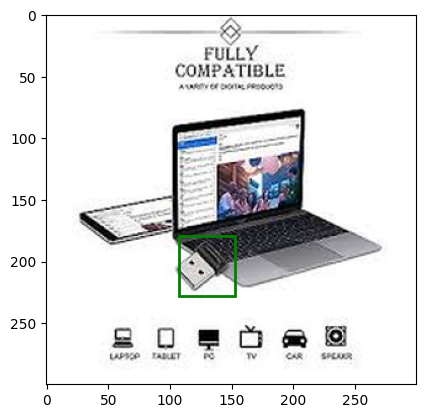

In [ ]:
#predict as 1 usb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Specify the file path for the image
image_path = '/content/images - 2024-10-22T021159.911.bmp'  # Replace with your BMP image path

# Read the image using OpenCV
image = cv2.imread(image_path)

# Resize the image to 300x300
image_resized = cv2.resize(image, (300, 300))

# Convert the image from BGR (OpenCV default) to RGB for Matplotlib
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Coordinates and size of the rectangle (x, y, w, h) after resizing
# Adjust these values based on the new image dimensions
x, y, w, h = 107, 179, 46, 49 # Replace with your values

# Create a figure and axis with Matplotlib
fig, ax = plt.subplots()

# Display the resized image
ax.imshow(image_rgb)

# Create a rectangle patch
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')  # Green rectangle

# Add the rectangle to the plot
ax.add_patch(rect)

# Show the plot with the resized image and rectangle
plt.show()

# Optionally, save the output plot as an image
output_path = 'resized_image_with_rectangle.png'
fig.savefig(output_path)

